<a href="https://colab.research.google.com/github/HoshiBatista/Computer-Vision-projects/blob/main/notebooks/yolo_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install ultralytics opencv-python matplotlib torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.2 MB/s eta 0:00:00


In [2]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO

In [3]:
model = YOLO("yolov8n.pt")

In [4]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [5]:
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [6]:
results = model.predict(
    source="https://ultralytics.com/images/zidane.jpg",
    conf=0.25,
    iou=0.45,
    imgsz=640,
    device=-1,
)

WARNING ⚠️ Failed to initialize pynvml, GPU stats disabled: NVML Shared Library Not Found
Searching for 1 idle GPUs with free memory >= 20.0% and free utilization >= 0.0%...
WARNING ⚠️ NVML stats unavailable.

image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 202.0ms
Speed: 11.3ms preprocess, 202.0ms inference, 29.6ms postprocess per image at shape (1, 3, 384, 640)


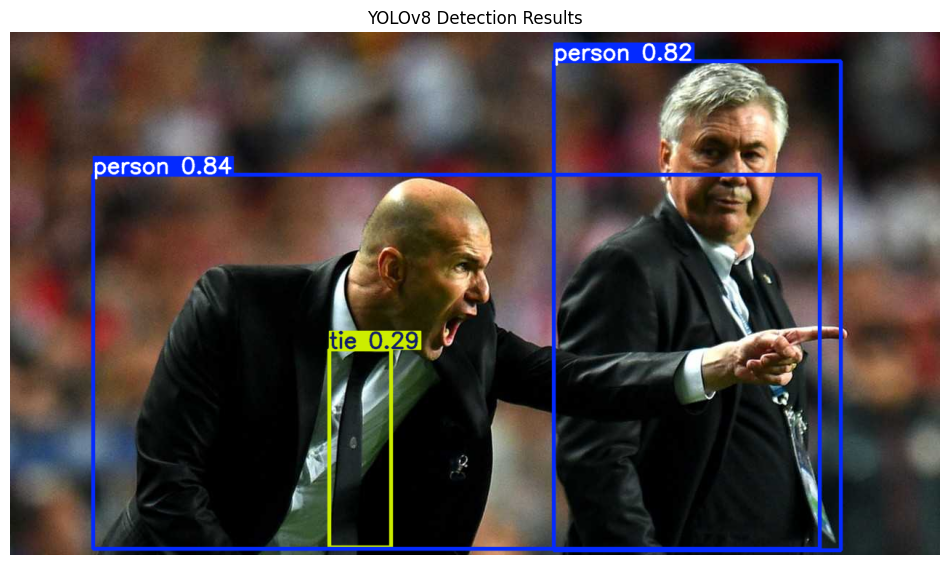

In [9]:
for r in results:
    im_array = r.plot()

    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.title('YOLOv8 Detection Results')
    plt.show()

In [10]:
for r in results:
    print("Тип объекта:", type(r))
    print("Доступные атрибуты:", dir(r))

    print("\nBoxes (bounding boxes):")
    print(r.boxes)  # Ultralytics' Box object
    print("Shape:", r.boxes.xyxy.shape)  # [N, 4] в формате (x1, y1, x2, y2)
    print("Confidence:", r.boxes.conf)   # [N]
    print("Classes:", r.boxes.cls)       # [N] индексы классов

    print("\nMasks (для segmentation):")
    # print(r.masks)  # Если используем yolov8n-seg.pt

Тип объекта: <class 'ultralytics.engine.results.Results'>
Доступные атрибуты: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'masks', 'names', 'new', 'numpy', 'obb', 'orig_img', 'orig_shape', 'path', 'plot', 'probs', 'save', 'save_crop', 'save_dir', 'save_txt', 'show', 'speed', 'summary', 'to', 'to_csv', 'to_df', 'to_json', 'update', 'verbose']

Boxes (bounding boxes):
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 27.])
conf: tensor([0.8360, 0.8190, 0.2910])
data: tensor([[1.1487e+02, 1.9741e+02, 1.1145e+03, 7.1189e+02, 8.3597e-01, 0.0000e+00],
   

In [13]:
# Экспортируем в TFLite
model.export(
    format="tflite",     # Формат экспорта
    int8=True,           # Квантование INT8 (уменьшает размер в 4x)
    data="coco128.yaml", # Данные для калибровки при квантовании
    imgsz=320            # Меньший размер для мобильных устройств
)

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 84, 2100) (6.2 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0,<=1.19.1', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 20 packages in 1.75s
Prepared 11 packages in 1.48s
Installed 11 packages in 218ms
 + ai-edge-litert==2.1.0rc1
 + backports-strenum==1.3.1
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnx-graphsurgeon==0.5.8
 + onnx2tf==1.28.5
 + onnxruntime==1.24.0.dev20251031003
 + onnxslim==0.1.75
 + sng4onnx==1.0.4

requirements: AutoUpdate success ✅ 4.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for

'yolov8n_saved_model/yolov8n_int8.tflite'

In [4]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="yolov8n_saved_model/yolov8n_int8.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'images', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'Identity', 'index': 407, 'shape': array([   1,   84, 2100], dtype=int32), 'shape_signature': array([   1,   84, 2100], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
